**In this Python notebook we look at a tmdb dataset that contains diverse attributes of selected movies. The notebook focuses on doing simple descriptive analysis of the data, including summarization and visualization.**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

In [6]:
%matplotlib inline  

import matplotlib.pyplot as plt

from matplotlib import style    #style lets us customize our charts

import matplotlib as mpl

In [7]:
import os

**Load the git to access the data file**

In [2]:
! git clone https://github.com/vibsabhishek/CAIF.git

Cloning into 'CAIF'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


**`Read in the data file. The head() function shows the first few rows of data.`**

In [3]:
dt = pd.read_csv('CAIF/tmdb_attributes.csv')
dt.head()

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,285,en,Pirates of the Caribbean: At World's End,139.082615,5/19/07,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,en,Spectre,107.376788,10/26/15,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,49026,en,The Dark Knight Rises,112.312950,7/16/12,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,49529,en,John Carter,43.926995,3/7/12,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
dt.sort_values('revenue', ascending=False)

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,597,en,Titanic,100.025899,11/18/97,1845034188,194.0,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,24428,en,The Avengers,144.448633,4/25/12,1519557910,143.0,Some assembly required.,The Avengers,7.4,11776
28,150000000,135397,en,Jurassic World,418.708552,6/9/15,1513528810,124.0,The park is open.,Jurassic World,6.5,8662
44,190000000,168259,en,Furious 7,102.322217,4/1/15,1506249360,137.0,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0,41248,fr,La Fille du RER,2.351706,3/18/09,0,105.0,NaN,The Girl on the Train,5.6,10
3199,0,291081,en,Red Riding: In the Year of Our Lord 1974,7.247023,2/28/09,0,102.0,"An epic tale of murder, corruption and obsession.",Red Riding: In the Year of Our Lord 1974,7.0,54
3197,6500000,8883,da,Flammen & Citronen,7.028946,3/25/08,0,130.0,NaN,Flame & Citron,6.8,68
3194,9000000,12454,en,All or Nothing,2.872281,5/17/02,0,128.0,NaN,All or Nothing,7.0,33


### Other Settings


### Import from personal github

In [21]:
! git clone https://github.com/kadowagg/UCI.git

Cloning into 'UCI'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 47.26 MiB | 14.49 MiB/s, done.


In [43]:
aatt = pd.read_excel('UCI/artist_attributes.xlsx')
aatt.head(1)

,artist_id,name
0,nm0000001,Fred Astaire


In [44]:
a2i = pd.read_excel('UCI/artist_to_imdb.xlsx')
a2i.head(1)

,artist_id,imdb_id
0,nm0000001,tt0050419


In [45]:
iatt = pd.read_excel('UCI/clean_imdb_attributes.xlsx')
iatt.head(1)

,tid,title,url,imdbRating,duration,year,nrOfWins,nrOfNominations
0,tt0343112,Traffic Crossing Leeds Bridge (1888),http://www.imdb.com/title/tt0343112/,7.2,2.0,1888.0,0,0


In [49]:
iatt.rename(columns={'tid': 'imdbId'}, inplace=True)
iatt.head(1)

,imdbId,title,url,imdbRating,duration,year,nrOfWins,nrOfNominations
0,tt0343112,Traffic Crossing Leeds Bridge (1888),http://www.imdb.com/title/tt0343112/,7.2,2.0,1888.0,0,0


In [46]:
igen = pd.read_excel('UCI/imdb_genres.xlsx')
igen.head(1)

,genre,id
0,Comedy,tt0012349


In [75]:
igen.rename(columns={'id': 'imdbId'}, inplace=True)
igen.head()

,genre,imdbId
0,Comedy,tt0012349
1,Drama,tt0012349
2,Family,tt0012349
3,Adventure,tt0015864
4,Comedy,tt0015864


In [55]:
links = pd.read_excel('UCI/links.xlsx')
links.head(1)

,imdbId,movieId,tmdbId
0,tt0114709,1,862.0


In [76]:
mgen = pd.read_excel('UCI/movie_genres.xlsx')
mgen.head()

,Key,genre,movieID,title
0,0,Adventure,1,Toy Story (1995)
1,1,Animation,1,Toy Story (1995)
2,2,Children,1,Toy Story (1995)
3,3,Comedy,1,Toy Story (1995)
4,4,Fantasy,1,Toy Story (1995)


In [74]:
mkey = pd.read_excel('UCI/movie_title_keywords.xlsx')
mkey.head()
#many key words to each movie

,id,keyword,movieID,title
0,0,Toy,1,Toy Story (1995)
1,1,Story,1,Toy Story (1995)
2,2,1995,1,Toy Story (1995)
3,3,Toy Story,1,Toy Story (1995)
4,4,Jumanji,2,Jumanji (1995)


In [34]:
movies = pd.read_excel('UCI/movies.xlsx')
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [35]:
ratings = pd.read_excel('UCI/ratings.xlsx')
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027


In [ ]:
ratingsm = pd.read_excel('UCI/ratings.xlsx')
ratingsm.head(1)

In [36]:
tatt = pd.read_excel('UCI/tmdb_attributes.xlsx')
tatt.head(1)

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800


In [52]:
tatt.rename(columns={'id': 'tmdbId'}, inplace=True)
tatt.head(1)

,budget,tmdbId,original_language,original_title,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800


In [37]:
tgen = pd.read_excel('UCI/tmdb_genres.xlsx')
tgen.head(1)

,Unnamed: 0,genre,movieID,title
0,0,Action,19995,Avatar


In [73]:
tgen.rename(columns={'movieID': 'tmdbId'}, inplace=True)
tgen.head()
#many genres to the same movie
#manipulate?

,Unnamed: 0,genre,tmdbId,title
0,0,Action,19995,Avatar
1,1,Adventure,19995,Avatar
2,2,Fantasy,19995,Avatar
3,3,SciFi,19995,Avatar
4,4,Adventure,285,Pirates of the Caribbean: At World's End


In [38]:
tkey = pd.read_excel('UCI/tmdb_overview_keywords.xlsx')
tkey.head(1)

,Unnamed: 0,TMDB ID,keyword,title
0,0,19995,22nd century,Avatar


In [50]:

tkey.rename(columns={'TMDB ID': 'tmdbId'}, inplace=True)
tkey.head(1)

,Unnamed: 0,tmdbId,keyword,title
0,0,19995,22nd century,Avatar


In [ ]:
## All table abbreviations
# aatt
# a2i
# iatt
# igen
# links
# mgen
# mkey
# movies
# ratings
# tatt
# tgen
# tkey


### Join on links and movies

In [68]:
links.head(1)

,imdbId,movieId,tmdbId
0,tt0114709,1,862.0


In [69]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [70]:
movie2link = pd.merge(links,movies,on='movieId')
movie2link.head(3)

,imdbId,movieId,tmdbId,title,genres
0,tt0114709,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,tt0113497,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,tt0113228,3,15602.0,Grumpier Old Men (1995),Comedy|Romance


In [71]:
iatt.head(1)

,imdbId,title,url,imdbRating,duration,year,nrOfWins,nrOfNominations
0,tt0343112,Traffic Crossing Leeds Bridge (1888),http://www.imdb.com/title/tt0343112/,7.2,2.0,1888.0,0,0


In [72]:
combo = pd.merge(movie2link,iatt,on='imdbId')
combo.head(3)


,imdbId,movieId,tmdbId,title_x,genres,title_y,url,imdbRating,duration,year,nrOfWins,nrOfNominations
0,tt0114709,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),http://www.imdb.com/title/tt0114709/,8.3,4860.0,1995.0,19,13
1,tt0113497,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,Jumanji (1995),http://www.imdb.com/title/tt0113497/,6.8,6240.0,1995.0,4,8
2,tt0113228,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,Der dritte Fr√ºhling (1995),http://www.imdb.com/title/tt0113228/,6.5,6060.0,1995.0,2,1


In [77]:
del combo['title_y']
combo.head(3)

,imdbId,movieId,tmdbId,title_x,genres,url,imdbRating,duration,year,nrOfWins,nrOfNominations
0,tt0114709,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,8.3,4860.0,1995.0,19,13
1,tt0113497,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,http://www.imdb.com/title/tt0113497/,6.8,6240.0,1995.0,4,8
2,tt0113228,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,6.5,6060.0,1995.0,2,1


In [83]:
ratingsm.head(1)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027


In [84]:
del ratingsm['userId']
ratingsm.head()

,movieId,rating,timestamp
0,2,3.5,1112486027
1,29,3.5,1112484676
2,32,3.5,1112484819
3,47,3.5,1112484727
4,50,3.5,1112484580


In [89]:
ratingbymovie = ratingsm.groupby(['movieId'],as_index=False)['rating'].mean().sort_values('rating',ascending=False)
ratingbymovie.head()

,movieId,rating
12789,95218,5.0
1607,1706,5.0
6859,7330,5.0
130,134,5.0
10461,60227,5.0


In [90]:
ratingbymovie.rating.value_counts()

3.500000    930
3.000000    772
4.000000    771
2.500000    425
4.500000    307
           ... 
3.776699      1
2.926667      1
3.315009      1
3.046377      1
3.717448      1
Name: rating, Length: 4116, dtype: int64

In [91]:
combo2 = pd.merge(combo,ratingbymovie,on='movieId')
combo2.head(3)
#gonna stop merging here

,imdbId,movieId,tmdbId,title_x,genres,url,imdbRating,duration,year,nrOfWins,nrOfNominations,rating
0,tt0114709,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,8.3,4860.0,1995.0,19,13,3.959323
1,tt0113497,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,http://www.imdb.com/title/tt0113497/,6.8,6240.0,1995.0,4,8,3.268398
2,tt0113228,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,6.5,6060.0,1995.0,2,1,3.186861


In [93]:
combo2['scaled_imdbRating'] = combo2.imdbRating /2
combo2.head()
#gonna stop here

,imdbId,movieId,tmdbId,title_x,genres,url,imdbRating,duration,year,nrOfWins,nrOfNominations,rating,scaled_imdbRating
0,tt0114709,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,8.3,4860.0,1995.0,19,13,3.959323,4.15
1,tt0113497,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,http://www.imdb.com/title/tt0113497/,6.8,6240.0,1995.0,4,8,3.268398,3.40
2,tt0113228,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,6.5,6060.0,1995.0,2,1,3.186861,3.25
3,tt0114885,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,http://www.imdb.com/title/tt0114885/,5.5,7440.0,1995.0,8,8,3.000000,2.75
4,tt0113041,5,11862.0,Father of the Bride Part II (1995),Comedy,http://www.imdb.com/title/tt0113041/,5.8,6360.0,1995.0,1,1,3.143836,2.90


**Identify the different data types**

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   id                 4803 non-null   int64  
 2   original_language  4803 non-null   object 
 3   original_title     4803 non-null   object 
 4   popularity         4803 non-null   float64
 5   release_date       4802 non-null   object 
 6   revenue            4803 non-null   int64  
 7   runtime            4801 non-null   float64
 8   tagline            3959 non-null   object 
 9   title              4803 non-null   object 
 10  vote_average       4803 non-null   float64
 11  vote_count         4803 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 450.4+ KB


aatt.info()
a2i.info()
iatt.info()
igen.info()
links.info()
mgen.info()
mkey.info()
movies.info()
ratings.info()
tatt.info()
tgen.info()
tkey.info()

In [61]:
aatt.shape


(175719, 2)

In [64]:
aatt.dtypes

artist_id    object
name         object
dtype: object

In [65]:
links.dtypes

imdbId      object
movieId      int64
tmdbId     float64
dtype: object

In [66]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

### Q1. Which variables are categorical?

In [5]:
# objects, bool

### Q2. Which variables are numerical?

In [5]:
## Integers and Floats, datetime

**Create a summary of the data. This function only shows a summary of the numeric variables**

In [109]:
dt = tatt

In [110]:
dt.describe()

,budget,tmdbId,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**Plot the histogram of runtime. Here we are treating runtime as a continious variable.**

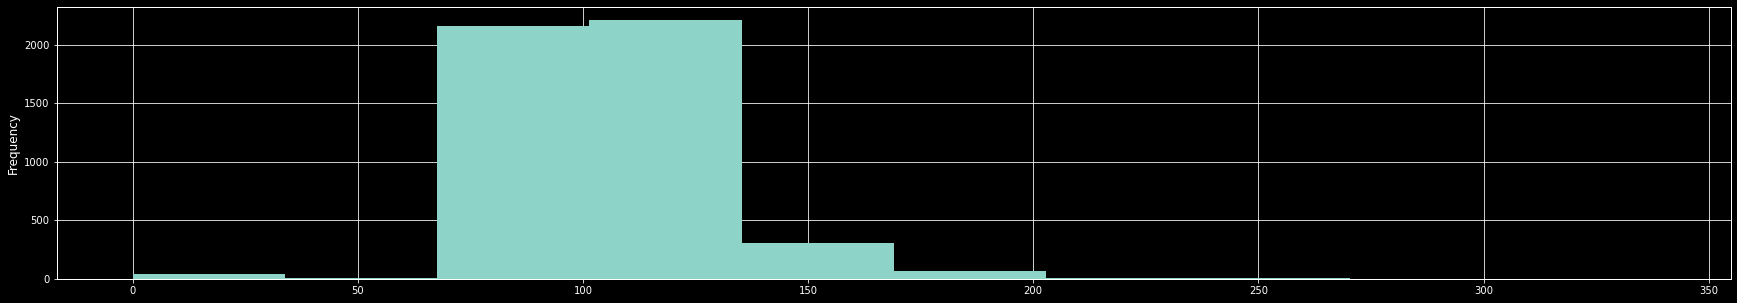

In [111]:
dt['runtime'].plot.hist()

**Fancy histogram with header and axis labels. A similar logic can be used to construct any type of bar chart. In this case, we are treating points as a discrete (nominal) variable.**

Text(0, 0.5, 'Frequency')

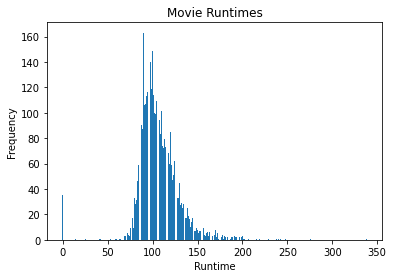

In [8]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = dt['runtime'].value_counts() 

# get x and y data 
runtime = data.index 
frequency = data.values 

# create bar chart 
ax.bar(runtime, frequency) 

# set title and labels 
ax.set_title('Movie Runtimes') 
ax.set_xlabel('Runtime') 
ax.set_ylabel('Frequency')

### Q3. Plot the histogram of 'budget' and 'revenue'

In [113]:
data = dt['budget']
data2 = dt['revenue']

In [114]:
data.head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [117]:
data.values 

array([237000000, 300000000, 245000000, ...,         0,         0,
               0])

In [115]:
data2.head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [116]:
data2.values 

array([2787965087,  961000000,  880674609, ...,          0,          0,
                0])

In [118]:
revenue = data2.values 
budget = data.values 

In [123]:
ax.bar(budget, revenue) 

<BarContainer object of 4803 artists>

### Q4. Do you think the data should transformed for better visualization? If so, transform and re-plot the data.

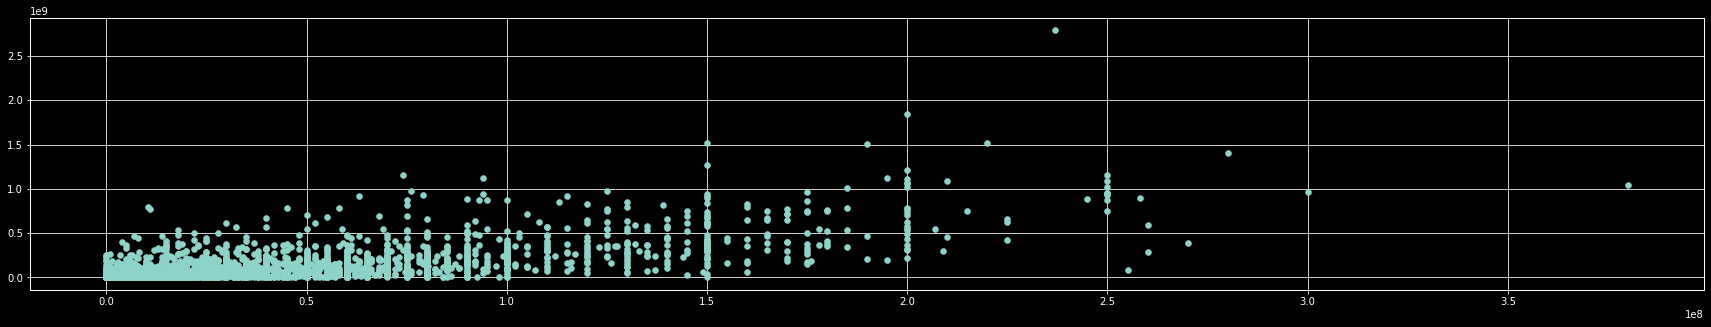

In [133]:
chart = plt.scatter(dt['budget'], dt['revenue'])
chart

#### Other ways of visualizing

In [9]:
#Similar as before, but instead of creating the x and y data, just get the value counts for each point and sort them before plotting.
freq_runtime = dt['runtime'].value_counts()

#show that the freq chart looks like
freq_runtime

90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
338.0      1
53.0       1
214.0      1
194.0      1
179.0      1
Name: runtime, Length: 156, dtype: int64

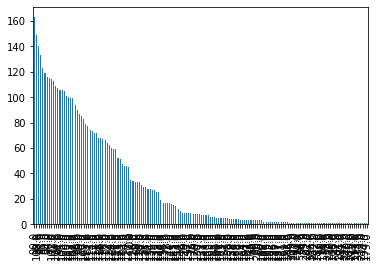

In [10]:
#Plot the frequency chart
freq_runtime.plot.bar()

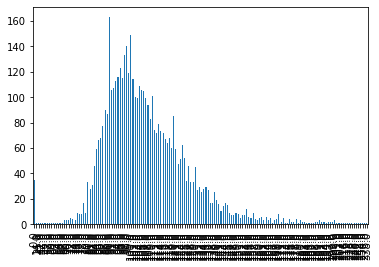

In [11]:
#sort the points to plot before plotting
freq_runtime.sort_index().plot.bar()

**Bin the runtime into long (>200), fair (90-200) and short (<90) categories**

In [12]:
category = pd.cut(dt.runtime, bins = [0, 90, 120, 500],labels=['Short','Fair','Long'])
category.value_counts()

Fair     2945
Long      988
Short     833
Name: runtime, dtype: int64

In [13]:
#Add the categories to the dataframe 
dt.insert(4, "runtime_category", category)
dt.head()

,budget,id,original_language,original_title,runtime_category,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,Long,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,285,en,Pirates of the Caribbean: At World's End,Long,139.082615,5/19/07,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,en,Spectre,Long,107.376788,10/26/15,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,49026,en,The Dark Knight Rises,Long,112.312950,7/16/12,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,49529,en,John Carter,Long,43.926995,3/7/12,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


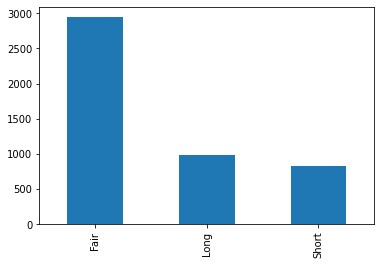

In [14]:
#Plot the categorical variable
freq_category = dt.runtime_category.value_counts()
freq_category.plot.bar()

#### Find correlation between variables

In [15]:
dt.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


### Q5. Interprest these correlations.

In [15]:
#Positive Correlation: both variables change in the same direction.
#Neutral Correlation: No relationship in the change of the variables.
#Negative Correlation: variables change in opposite directions.

# The longer the runtime, the higher the average vote?


#### Visually show the relation between two variables - scatter plot

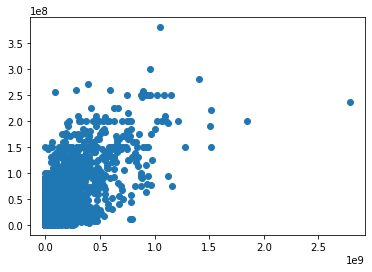

In [16]:
plt.scatter(dt['revenue'], dt['budget'])

### Q6. Visually show the relationship between 'popularity' and 'vote_average'

In [135]:
dt.head()

,budget,tmdbId,original_language,original_title,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,285,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,en,Spectre,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,49026,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,49529,en,John Carter,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


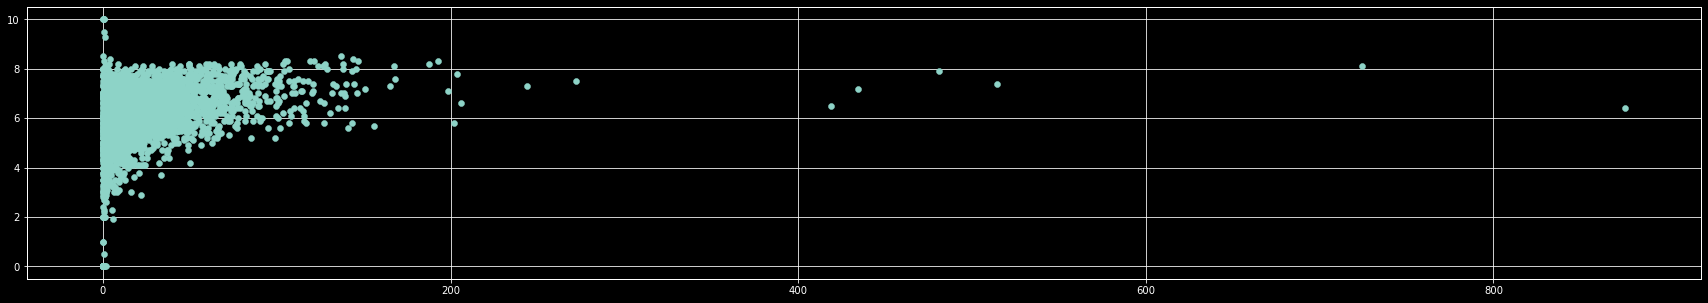

In [137]:
plt.scatter(dt['popularity'], dt['vote_average'])

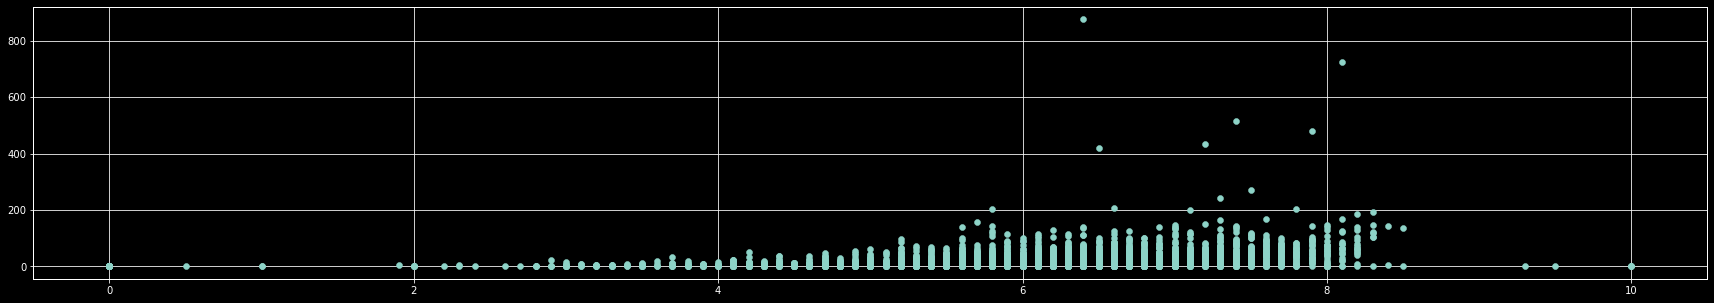

In [138]:
plt.scatter( dt['vote_average'], dt['popularity'],)

# Own analysis

In [94]:
combo2

,imdbId,movieId,tmdbId,title_x,genres,url,imdbRating,duration,year,nrOfWins,nrOfNominations,rating,scaled_imdbRating
0,tt0114709,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,8.3,4860.0,1995.0,19,13,3.959323,4.15
1,tt0113497,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,http://www.imdb.com/title/tt0113497/,6.8,6240.0,1995.0,4,8,3.268398,3.40
2,tt0113228,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,6.5,6060.0,1995.0,2,1,3.186861,3.25
3,tt0114885,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,http://www.imdb.com/title/tt0114885/,5.5,7440.0,1995.0,8,8,3.000000,2.75
4,tt0113041,5,11862.0,Father of the Bride Part II (1995),Comedy,http://www.imdb.com/title/tt0113041/,5.8,6360.0,1995.0,1,1,3.143836,2.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,tt1951265,116823,131631.0,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,http://www.imdb.com/title/tt1951265/,NaN,NaN,2014.0,0,0,3.600000,NaN
5163,tt2170439,117590,227159.0,Horrible Bosses 2 (2014),Comedy|Crime,http://www.imdb.com/title/tt2170439/,NaN,NaN,2014.0,0,0,2.300000,NaN
5164,tt2310332,118696,122917.0,The Hobbit: The Battle of the Five Armies (2014),Adventure|Fantasy,http://www.imdb.com/title/tt2310332/,NaN,NaN,2014.0,0,0,3.300000,NaN
5165,tt1571404,128736,37058.0,I'm Here (2010),Drama,http://www.imdb.com/title/tt1571404/,7.9,1740.0,2010.0,0,0,1.000000,3.95


Text(0.5, 1.0, 'User Ratings vs IMDB Ratings')

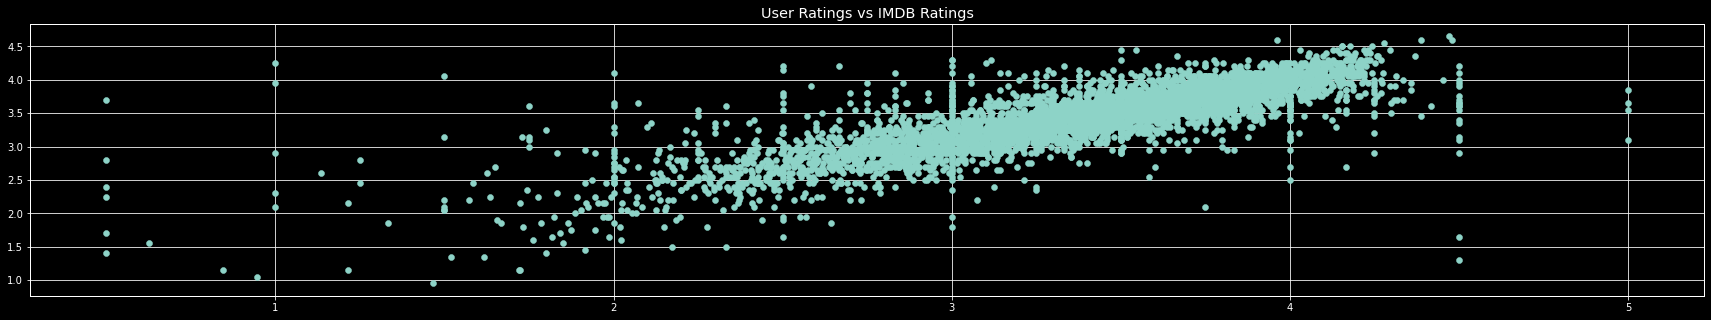

In [105]:
plt.scatter(combo2['rating'], combo2['scaled_imdbRating'])
plt.style.use(['dark_background'])
mpl.rc('figure', figsize=(30,5))
plt.title('User Ratings vs IMDB Ratings')